In [1]:
import sklearn

print("Versi scikit-learn yang terinstal:", sklearn.__version__)

Versi scikit-learn yang terinstal: 1.3.2


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import os
import warnings
# warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn')
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('./data_lulus_tepat_waktu.csv')

In [3]:
dataset.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


# EXPLORATORY DATA ANALYSIS (EDA) AND PREPROCESS DATA

In [4]:
dataset.shape

(1687, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ip1     1687 non-null   float64
 1   ip2     1687 non-null   float64
 2   ip3     1687 non-null   float64
 3   ip4     1687 non-null   float64
 4   tepat   1687 non-null   object 
dtypes: float64(4), object(1)
memory usage: 66.0+ KB


In [6]:
dataset.isnull().values.any()

False

In [7]:
ket = {"Ya" : 0, "Tidak" : 1}
dataset["tepat"] = dataset["tepat"].map(ket)

In [8]:
dataset['tepat'].value_counts()

tepat
0    1552
1     135
Name: count, dtype: int64

In [9]:
print('Ya', round(dataset['tepat'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Tidak', round(dataset['tepat'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

Ya 92.0 % of the dataset
Tidak 8.0 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: YA || 1: Tidak)')

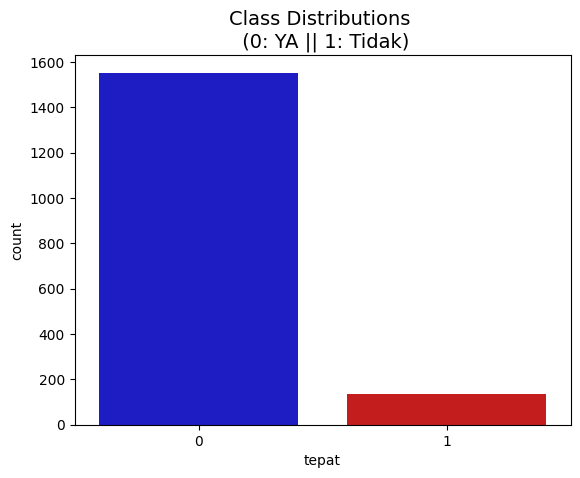

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#0101DF", "#DF0101"]
sns.countplot(x='tepat', data=dataset, palette=colors)
plt.title('Class Distributions \n (0: YA || 1: Tidak)', fontsize=14)

# Dataset tidak balance, jomplang perbedaannya.

kita Resampling datanya. Resampling ada 2 :


* Random Oversampling: Randomly duplicate examples in the minority class.
* Random Undersampling: Randomly delete examples in the majority class.

disini kita menggunakan random over sampling

In [11]:
# Class count
count_class_0, count_class_1 = dataset.tepat.value_counts()

# Divide by class
df_class_0 = dataset[dataset['tepat'] == 0]
df_class_1 = dataset[dataset['tepat'] == 1]

Random over-sampling:
tepat
0    1552
1    1552
Name: count, dtype: int64


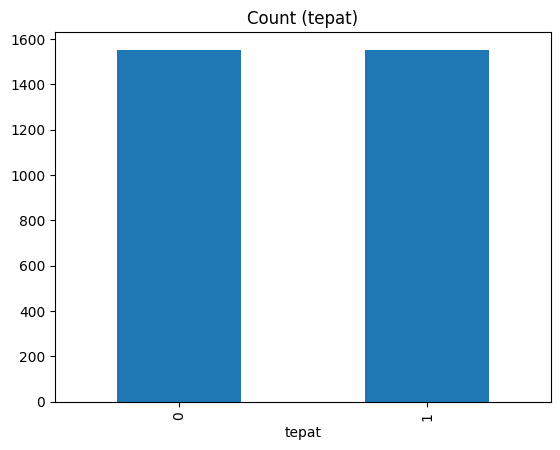

In [12]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.tepat.value_counts())

df_test_over.tepat.value_counts().plot(kind='bar', title='Count (tepat)');

In [13]:
df_test_over.tepat.value_counts()

tepat
0    1552
1    1552
Name: count, dtype: int64

In [14]:
x = df_test_over.iloc[:, :-1].values
y = df_test_over.iloc[:, -1].values

# **TARGET PRESENTASI SELANJUTNYA ADALAH MEMBANGUN MODEL SEPERTI PROSES-PROSES DIBAWAH INI SAMPAI PALING BAWAH**

# Membangun Model dan Melakukan testing overfitting pada model. Overfitting dilakukan dengan membandingkan akurasi training dan akurasi testing 

In [15]:
# Splitting data menjadi Training:Testing dengan perbandingan 80:20

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# Membangun Model dan Melakukan cek akurasi terhadap Data Trainingnya

# Definisi jumlah pohon (num_trees) dan nilai seed
num_trees = 100
seed = 42

# Menambahkan model ke dalam list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))

# Mengevaluasi setiap model dengan data Training untuk melihat yang tertinggi
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=2, shuffle=True, random_state=seed)  # Mengubah shuffle menjadi True
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.649213 (0.003766)
LDA: 0.638746 (0.006701)
KNN: 0.799024 (0.022232)
DT: 0.917030 (0.014532)
NB: 0.616598 (0.013539)
RF: 0.937169 (0.009691)


In [17]:
# Evaluasi Model dengan data Testing

# Inisialisasi dictionary untuk menyimpan akurasi model
test_results = {}

'''
Melatih dan menguji setiap model dengan data testing untuk melihat performa model dan dibandingkan dengan akurasi di training untuk
mengengetahui apakah model ovefitting atau tidak.
'''

for name, model in models:
    # Melatih model pada seluruh data pelatihan
    model.fit(x_train, y_train)
    
    # Menguji model pada data uji
    y_pred = model.predict(x_test)
    
    # Menghitung akurasi dan menyimpannya dalam dictionary
    accuracy = accuracy_score(y_test, y_pred)
    test_results[name] = accuracy
    
    # Menampilkan hasil
    print(f"{name}: {accuracy}")

LR: 0.6505636070853462
LDA: 0.642512077294686
KNN: 0.895330112721417
DT: 0.9468599033816425
NB: 0.6247987117552335
RF: 0.9758454106280193


# Dari hasil diatas data tidak mengalami ovefitting dan yang tertinggi adalah model Random Forest, diikut oleh DecisionTree

# **Random Forest (RF) memiliki akurasi paling besar, jadi dipilih sebagai model terbaik**

In [18]:
rf = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9758454106280193
[[312  15]
 [  0 294]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       327
           1       0.95      1.00      0.98       294

    accuracy                           0.98       621
   macro avg       0.98      0.98      0.98       621
weighted avg       0.98      0.98      0.98       621



# Testing ketepatan model

In [19]:
# ip1 = 3.17
# ip2 = 3.02
# ip3 = 3.28
# ip4 = 2.96

prediction_rf = rf.predict([[3.17,3.02,3.28,2.96]])
score1 = rf.score(x_test, y_test)

if prediction_rf[0] == 0:
    pred = "Tepat Waktu"
else:
    pred = "Tidak Tepat Waktu"
print('Prediksi :',pred)

Prediksi : Tidak Tepat Waktu


In [20]:
# ip1 = 3.07
# ip2 = 3.04
# ip3 = 3.39
# ip4 = 3.55

prediction_rf=rf.predict([[3.07,3.04,3.39,3.55]])
score1 = rf.score(x_test, y_test)

if prediction_rf[0] == 0:
    pred = "Tepat Waktu"
else:
    pred = "Tidak Tepat Waktu"
print('Prediksi :',pred)

Prediksi : Tepat Waktu


# Implementasi ke Website menggunakan Streamlit (berbasis python)

# **Menyimpan Model Random Forest ke dalam bentuk File dengan extension (.pkl) dengan tujuan agar bisa digunakan didalam WEBSITE**

In [21]:
import pickle
# ===============================================================================
# Inisialisasi dan melatih model RandomForestClassifier

rf = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
rf.fit(x_train, y_train)

# ===============================================================================
# Menyimpan model ke dalam file dengan ekstensi .pkl menggunakan library pickle
# Model dengan Extensi .pkl ini yang nantinya akan digunakan didalam Website

file_name = "random_forest_model.pkl" #memberi nama file sesuai yang kalian inginkan dan berikan extensionnya
with open(file_name, 'wb') as file:
    pickle.dump(rf, file)
print("Model saved as", file_name)

print('\nModel ini yang nantinya akan kalian gunakan ke dalam website sebagai model prediksi')
# ===============================================================================

Model saved as random_forest_model.pkl

Model ini yang nantinya akan kalian gunakan ke dalam website sebagai model prediksi


# **Cara memanggil file .pkl yang sudah dibuat di WEBSITE jika ingin digunakan**

In [31]:
# Cara memanggil file model yang sudah dibuat sebelumnya ke dalam code website
'''
1. Masukan file .pkl ke dalam satu folder di website
2. Panggil alamat file (file path) beserta nama filenya seperti code dibawah (./random_forest_model.pkl)
'''

# ===============================================================================
# Load Model (Cara Memanggil Model)

with open("./random_forest_model.pkl", 'rb') as file:
    loaded_model = pickle.load(file)
# ===============================================================================

'''
3.od Ce dibawah ini adalah cara melakukan prediksi, sama seperti jika anda memanggil prediksi di jupyter
'''

# ====================================================================
# Menggunakan model yang dimuat yang sudah disimpan pada variabel 'loaded_model'
# Sesuaikan dengan model prediksi kalian masing-masing

predictions = loaded_model.predict([[2.30,1.97,1.80,1.01]])

# Lakukan evaluasi model atau tindakan lain yang diperlukan
if predictions[0] == 0:
    pred = "Tepat Waktu"
else:
    pred = "Tidak Tepat Waktu"
print('Prediksi :',pred)
# ====================================================================

Prediksi : Tidak Tepat Waktu
